필요한 모듈과 라이브러리들을 가져 옴

In [1]:
#import the libraries For data analysis 
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

matplotlib에서 한글이 깨지는 상황을 막기위해 코드 삽입

In [3]:
%matplotlib inline

import platform
path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system')

이미 가지고 있는 교통사고, 인구, 범죄, 세금 데이터들을 가공해 만든 임의의 통합데이터를 사용함

In [4]:
#Load the convert data
data_2015 = pd.read_csv('./data/통합/2015통합.csv', engine='python')
data_2016=  pd.read_csv('./data/통합/2016통합.csv', engine='python')
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
crimeRate        78 non-null float64
city_idx         78 non-null int64
total            78 non-null int64
out_per          78 non-null float64
total_m          78 non-null int64
total_w          78 non-null int64
out_m            78 non-null int64
out_w            78 non-null int64
suicide_rate     78 non-null float64
tax              78 non-null int64
death            78 non-null int64
injured          78 non-null int64
cctv             78 non-null int64
city_id          78 non-null int64
city_name        78 non-null object
district_name    78 non-null object
dtypes: float64(3), int64(11), object(2)
memory usage: 9.8+ KB


In [5]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 16 columns):
crimeRate        78 non-null float64
city_idx         78 non-null int64
total            78 non-null int64
out_per          78 non-null float64
total_m          78 non-null int64
total_w          78 non-null int64
out_m            78 non-null int64
out_w            78 non-null int64
suicide_rate     78 non-null float64
tax              78 non-null int64
death            78 non-null int64
injured          78 non-null int64
cctv             78 non-null int64
city_id          78 non-null int64
city_name        78 non-null object
district_name    78 non-null object
dtypes: float64(3), int64(11), object(2)
memory usage: 9.8+ KB


두개의 데이터를 합쳐 하나의 total data로 한 후 작업을 실시

그러기 위해서는 데이터 구분을 위한 column 추가

In [6]:
data_2015['year'] = 2015
data_2016['year'] = 2016
data_2015['per_tax'] = data_2015['tax'] / data_2015['total']
data_2016['per_tax'] = data_2016['tax'] / data_2016['total']
data_2015.head()

,crimeRate,city_idx,total,out_per,total_m,total_w,out_m,out_w,suicide_rate,tax,death,injured,cctv,city_id,city_name,district_name,year,per_tax
0,0.007215,1,9904312,0.0340,4859535,5044777,165218,171898,19.9,9169412842,376,591,44457,1,서울특별시,서울,2015,925.800080
1,0.006780,2,2890451,0.0235,1455017,1435434,40224,27626,24.1,1764120424,136,255,8680,2,인천광역시,인천,2015,610.327047
2,0.009765,3,605619,0.0250,304789,300830,8914,6232,22.3,509905893,93,145,2249,3,제주특별자치도,제주,2015,841.958216
3,0.002440,4,204088,0.0219,103210,100878,2755,1716,19.7,328603432,19,24,1848,4,세종특별자치시,세종,2015,1610.106581
4,0.006199,5,1538394,0.0124,772243,766151,8933,10147,24.5,585202673,97,143,6356,5,대전광역시,대전,2015,380.398437


구분하기 편하게 district_name과 city_name을 합쳐 하나의 city 속성으로 하고

그 속성을 index로 변환

In [7]:
data_2015['city'] = data_2015['city_name'] +' ' +data_2015['district_name']
data_2015.set_index('city', inplace=True)
data_2016['city'] = data_2016['city_name'] +' ' +data_2016['district_name']
data_2016.set_index('city', inplace=True)

In [8]:
total_data = pd.concat([data_2015, data_2016])

In [9]:
total_data.head()

,crimeRate,city_idx,total,out_per,total_m,total_w,out_m,out_w,suicide_rate,tax,death,injured,cctv,city_id,city_name,district_name,year,per_tax
city,,,,,,,,,,,,,,,,,,
서울특별시 서울,0.007215,1,9904312,0.0340,4859535,5044777,165218,171898,19.9,9169412842,376,591,44457,1,서울특별시,서울,2015,925.800080
인천광역시 인천,0.006780,2,2890451,0.0235,1455017,1435434,40224,27626,24.1,1764120424,136,255,8680,2,인천광역시,인천,2015,610.327047
제주특별자치도 제주,0.009765,3,605619,0.0250,304789,300830,8914,6232,22.3,509905893,93,145,2249,3,제주특별자치도,제주,2015,841.958216
세종특별자치시 세종,0.002440,4,204088,0.0219,103210,100878,2755,1716,19.7,328603432,19,24,1848,4,세종특별자치시,세종,2015,1610.106581
대전광역시 대전,0.006199,5,1538394,0.0124,772243,766151,8933,10147,24.5,585202673,97,143,6356,5,대전광역시,대전,2015,380.398437


여기서 필요한 정보를 제외하고는 삭제를 진행

전체 남성, 전체 여성 ,내국인 남성, 외국인 여성, 외국인 남성 속성을 삭제

In [10]:
#delete the non_valueable
del data_2015['total_m']
del data_2015['total_w']
del data_2015['out_m']
del data_2015['out_w']
del data_2015['city_idx']
del data_2016['total_m']
del data_2016['total_w']
del data_2016['out_m']
del data_2016['out_w']
del data_2016['city_idx']

### Correlation Analysis

상관분석은 numpy 모듈의 corrcoef를 사용함

상관분석에서

절댓값 0.1 이하는 무시하고

절댓값 0.3 이하는 약한 상관관계를

절댓값 0.7 이하는 강한 상관관계를 나타낸다

세금을 1인당 세금 비율로 계산

##### 우선은 범죄율과 다른 데이터들의상관관계를 분석

In [11]:
print('2015년 상관관계')
print('범죄율 / 인구수: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['total']))
print('범죄율 / 외국인 비율: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['out_per']))
print('범죄율 / 자살율: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['suicide_rate']))
print('범죄율 / 소득수준: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['per_tax']))
print('범죄율 / 교통사고사망자: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['death']))
print('범죄율 / 교통사고부상자: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['injured']))
print('범죄율 / cctv: ')
print(np.corrcoef(data_2015['crimeRate'], data_2015['cctv']))


2015년 상관관계
범죄율 / 인구수: 
[[1.         0.10146425]
 [0.10146425 1.        ]]
범죄율 / 외국인 비율: 
[[1.         0.09359429]
 [0.09359429 1.        ]]
범죄율 / 자살율: 
[[1.         0.24902552]
 [0.24902552 1.        ]]
범죄율 / 소득수준: 
[[ 1.         -0.32355447]
 [-0.32355447  1.        ]]
범죄율 / 교통사고사망자: 
[[1.         0.08624482]
 [0.08624482 1.        ]]
범죄율 / 교통사고부상자: 
[[1.        0.0782215]
 [0.0782215 1.       ]]
범죄율 / cctv: 
[[1.         0.11391782]
 [0.11391782 1.        ]]


그 다음은 인구수와 상관관계를 보려고 한다

In [12]:
print('인구수 / 외국인비율: ')
print(np.corrcoef(data_2015['total'], data_2015['out_per']))
print('인구수 / 자살율: ')
print(np.corrcoef(data_2015['total'], data_2015['suicide_rate']))
print('인구수 / 소득수준: ')
print(np.corrcoef(data_2015['total'], data_2015['per_tax']))
print('인구수 / 교통사고사망자: ')
print(np.corrcoef(data_2015['total'], data_2015['death']))
print('인구수 / 교통사고부상자: ')
print(np.corrcoef(data_2015['total'], data_2015['injured']))


인구수 / 외국인비율: 
[[ 1.         -0.00403427]
 [-0.00403427  1.        ]]
인구수 / 자살율: 
[[ 1.         -0.13246616]
 [-0.13246616  1.        ]]
인구수 / 소득수준: 
[[1.         0.09165723]
 [0.09165723 1.        ]]
인구수 / 교통사고사망자: 
[[1.         0.94986205]
 [0.94986205 1.        ]]
인구수 / 교통사고부상자: 
[[1.         0.94859396]
 [0.94859396 1.        ]]


In [13]:
print('외국인비율 / 자살율: ')
print(np.corrcoef(data_2015['out_per'], data_2015['suicide_rate']))
print('외국인비율 / 소득수준: ')
print(np.corrcoef(data_2015['out_per'], data_2015['per_tax']))
print('외국인비율 / 교통사고사망자: ')
print(np.corrcoef(data_2015['out_per'], data_2015['death']))
print('외국인비율 / 교통사고부상자: ')
print(np.corrcoef(data_2015['out_per'], data_2015['injured']))
print('외국인비율 / cctv: ')
print(np.corrcoef(data_2015['out_per'], data_2015['cctv']))

외국인비율 / 자살율: 
[[1.         0.30129019]
 [0.30129019 1.        ]]
외국인비율 / 소득수준: 
[[1.         0.31729002]
 [0.31729002 1.        ]]
외국인비율 / 교통사고사망자: 
[[1.         0.00112959]
 [0.00112959 1.        ]]
외국인비율 / 교통사고부상자: 
[[1.         0.02786602]
 [0.02786602 1.        ]]
외국인비율 / cctv: 
[[1.00000000e+00 5.98327928e-04]
 [5.98327928e-04 1.00000000e+00]]


In [14]:
print('자살율 / 소득수준: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['per_tax']))
print('자살율 / 교통사고사망자: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['death']))
print('자살율 / 교통사고부상자: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['injured']))
print('자살율 / cctv: ')
print(np.corrcoef(data_2015['suicide_rate'], data_2015['cctv']))

자살율 / 소득수준: 
[[ 1.         -0.15333649]
 [-0.15333649  1.        ]]
자살율 / 교통사고사망자: 
[[ 1.         -0.09317746]
 [-0.09317746  1.        ]]
자살율 / 교통사고부상자: 
[[ 1.         -0.07926662]
 [-0.07926662  1.        ]]
자살율 / cctv: 
[[ 1.         -0.14257666]
 [-0.14257666  1.        ]]


In [15]:
print('소득수준 / 교통사고사망자: ')
print(np.corrcoef(data_2015['per_tax'], data_2015['death']))
print('소득수준 / 교통사고부상자: ')
print(np.corrcoef(data_2015['per_tax'], data_2015['injured']))
print('소득수준 / cctv: ')
print(np.corrcoef(data_2015['per_tax'], data_2015['cctv']))

소득수준 / 교통사고사망자: 
[[1.         0.11429554]
 [0.11429554 1.        ]]
소득수준 / 교통사고부상자: 
[[1.         0.13508144]
 [0.13508144 1.        ]]
소득수준 / cctv: 
[[1.         0.10656775]
 [0.10656775 1.        ]]


In [16]:
print('교통사고사망자 / 교통사고부상자: ')
print(np.corrcoef(data_2015['death'], data_2015['injured']))
print('교통사고사망자 / cctv: ')
print(np.corrcoef(data_2015['death'], data_2015['cctv']))

교통사고사망자 / 교통사고부상자: 
[[1.         0.98794248]
 [0.98794248 1.        ]]
교통사고사망자 / cctv: 
[[1.         0.90744523]
 [0.90744523 1.        ]]


In [17]:
print('교통사고부상자 / cctv: ')
print(np.corrcoef(data_2015['injured'], data_2015['cctv']))

교통사고부상자 / cctv: 
[[1.         0.89415973]
 [0.89415973 1.        ]]


##### 2016년도

In [18]:
print('2016년 상관관계')
print('범죄율 / 인구수: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['total']))
print('범죄율 / 외국인 비율: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['out_per']))
print('범죄율 / 자살율: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['suicide_rate']))
print('범죄율 / 소득수준: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['per_tax']))
print('범죄율 / 교통사고사망자: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['death']))
print('범죄율 / 교통사고부상자: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['injured']))
print('범죄율 / cctv: ')
print(np.corrcoef(data_2016['crimeRate'], data_2016['cctv']))


2016년 상관관계
범죄율 / 인구수: 
[[1.         0.08015944]
 [0.08015944 1.        ]]
범죄율 / 외국인 비율: 
[[1.         0.02958245]
 [0.02958245 1.        ]]
범죄율 / 자살율: 
[[1.         0.07748134]
 [0.07748134 1.        ]]
범죄율 / 소득수준: 
[[ 1.         -0.22498268]
 [-0.22498268  1.        ]]
범죄율 / 교통사고사망자: 
[[1.         0.06664036]
 [0.06664036 1.        ]]
범죄율 / 교통사고부상자: 
[[1.         0.05000537]
 [0.05000537 1.        ]]
범죄율 / cctv: 
[[1.         0.08810639]
 [0.08810639 1.        ]]


In [19]:
print('인구수 / 외국인비율: ')
print(np.corrcoef(data_2016['total'], data_2016['out_per']))
print('인구수 / 자살율: ')
print(np.corrcoef(data_2016['total'], data_2016['suicide_rate']))
print('인구수 / 소득수준: ')
print(np.corrcoef(data_2016['total'], data_2016['per_tax']))
print('인구수 / 교통사고사망자: ')
print(np.corrcoef(data_2016['total'], data_2016['death']))
print('인구수 / 교통사고부상자: ')
print(np.corrcoef(data_2016['total'], data_2016['injured']))


인구수 / 외국인비율: 
[[ 1.         -0.00892639]
 [-0.00892639  1.        ]]
인구수 / 자살율: 
[[ 1.         -0.17275661]
 [-0.17275661  1.        ]]
인구수 / 소득수준: 
[[1.         0.05499543]
 [0.05499543 1.        ]]
인구수 / 교통사고사망자: 
[[1.         0.95102988]
 [0.95102988 1.        ]]
인구수 / 교통사고부상자: 
[[1.         0.93108052]
 [0.93108052 1.        ]]


In [20]:
print('외국인비율 / 자살율: ')
print(np.corrcoef(data_2016['out_per'], data_2016['suicide_rate']))
print('외국인비율 / 소득수준: ')
print(np.corrcoef(data_2016['out_per'], data_2016['per_tax']))
print('외국인비율 / 교통사고사망자: ')
print(np.corrcoef(data_2016['out_per'], data_2016['death']))
print('외국인비율 / 교통사고부상자: ')
print(np.corrcoef(data_2016['out_per'], data_2016['injured']))
print('외국인비율 / cctv: ')
print(np.corrcoef(data_2016['out_per'], data_2016['cctv']))

외국인비율 / 자살율: 
[[1.         0.06484366]
 [0.06484366 1.        ]]
외국인비율 / 소득수준: 
[[1.         0.26407606]
 [0.26407606 1.        ]]
외국인비율 / 교통사고사망자: 
[[ 1.         -0.00196647]
 [-0.00196647  1.        ]]
외국인비율 / 교통사고부상자: 
[[ 1.         -0.01543173]
 [-0.01543173  1.        ]]
외국인비율 / cctv: 
[[ 1.         -0.00953766]
 [-0.00953766  1.        ]]


In [21]:
print('자살율 / 소득수준: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['per_tax']))
print('자살율 / 교통사고사망자: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['death']))
print('자살율 / 교통사고부상자: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['injured']))
print('자살율 / cctv: ')
print(np.corrcoef(data_2016['suicide_rate'], data_2016['cctv']))

자살율 / 소득수준: 
[[ 1.         -0.23232916]
 [-0.23232916  1.        ]]
자살율 / 교통사고사망자: 
[[ 1.         -0.13038329]
 [-0.13038329  1.        ]]
자살율 / 교통사고부상자: 
[[ 1.         -0.13889226]
 [-0.13889226  1.        ]]
자살율 / cctv: 
[[ 1.         -0.17923244]
 [-0.17923244  1.        ]]


In [22]:
print('소득수준 / 교통사고사망자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['death']))
print('소득수준 / 교통사고부상자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['injured']))
print('소득수준 / cctv: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['cctv']))

소득수준 / 교통사고사망자: 
[[1.         0.02771792]
 [0.02771792 1.        ]]
소득수준 / 교통사고부상자: 
[[1.         0.01892091]
 [0.01892091 1.        ]]
소득수준 / cctv: 
[[1.         0.06873569]
 [0.06873569 1.        ]]


In [23]:
print('교통사고사망자 / 교통사고부상자: ')
print(np.corrcoef(data_2016['death'], data_2016['injured']))
print('교통사고사망자 / cctv: ')
print(np.corrcoef(data_2016['death'], data_2016['cctv']))

교통사고사망자 / 교통사고부상자: 
[[1.         0.98901119]
 [0.98901119 1.        ]]
교통사고사망자 / cctv: 
[[1.        0.9060826]
 [0.9060826 1.       ]]


In [24]:
print('교통사고부상자 / cctv: ')
print(np.corrcoef(data_2016['injured'], data_2016['cctv']))

교통사고부상자 / cctv: 
[[1.         0.87478635]
 [0.87478635 1.        ]]


In [25]:
print('전체 상관관계')
print('범죄율 / 인구수: ')
print(np.corrcoef(total_data['crimeRate'], total_data['total']))
print('범죄율 / 외국인 비율: ')
print(np.corrcoef(total_data['crimeRate'], total_data['out_per']))
print('범죄율 / 자살율: ')
print(np.corrcoef(total_data['crimeRate'], total_data['suicide_rate']))
print('범죄율 / 소득수준: ')
print(np.corrcoef(total_data['crimeRate'], total_data['per_tax']))
print('범죄율 / 교통사고사망자: ')
print(np.corrcoef(total_data['crimeRate'], total_data['death']))
print('범죄율 / 교통사고부상자: ')
print(np.corrcoef(total_data['crimeRate'], total_data['injured']))
print('범죄율 / cctv: ')
print(np.corrcoef(total_data['crimeRate'], total_data['cctv']))


전체 상관관계
범죄율 / 인구수: 
[[1.         0.09081878]
 [0.09081878 1.        ]]
범죄율 / 외국인 비율: 
[[1.         0.06199373]
 [0.06199373 1.        ]]
범죄율 / 자살율: 
[[1.         0.16486644]
 [0.16486644 1.        ]]
범죄율 / 소득수준: 
[[ 1.         -0.26975468]
 [-0.26975468  1.        ]]
범죄율 / 교통사고사망자: 
[[1.         0.07516925]
 [0.07516925 1.        ]]
범죄율 / 교통사고부상자: 
[[1.        0.0624321]
 [0.0624321 1.       ]]
범죄율 / cctv: 
[[1.         0.10093016]
 [0.10093016 1.        ]]


In [26]:
print('인구수 / 외국인비율: ')
print(np.corrcoef(total_data['total'], total_data['out_per']))
print('인구수 / 자살율: ')
print(np.corrcoef(total_data['total'], total_data['suicide_rate']))
print('인구수 / 소득수준: ')
print(np.corrcoef(total_data['total'], total_data['per_tax']))
print('인구수 / 교통사고사망자: ')
print(np.corrcoef(total_data['total'], total_data['death']))
print('인구수 / 교통사고부상자: ')
print(np.corrcoef(total_data['total'], total_data['injured']))


인구수 / 외국인비율: 
[[ 1.         -0.00649204]
 [-0.00649204  1.        ]]
인구수 / 자살율: 
[[ 1.         -0.15103592]
 [-0.15103592  1.        ]]
인구수 / 소득수준: 
[[1.         0.07305761]
 [0.07305761 1.        ]]
인구수 / 교통사고사망자: 
[[1.         0.94954523]
 [0.94954523 1.        ]]
인구수 / 교통사고부상자: 
[[1.         0.93655229]
 [0.93655229 1.        ]]


In [27]:
print('외국인비율 / 자살율: ')
print(np.corrcoef(total_data['out_per'], total_data['suicide_rate']))
print('외국인비율 / 소득수준: ')
print(np.corrcoef(total_data['out_per'], total_data['per_tax']))
print('외국인비율 / 교통사고사망자: ')
print(np.corrcoef(total_data['out_per'], total_data['death']))
print('외국인비율 / 교통사고부상자: ')
print(np.corrcoef(total_data['out_per'], total_data['injured']))
print('외국인비율 / cctv: ')
print(np.corrcoef(total_data['out_per'], total_data['cctv']))

외국인비율 / 자살율: 
[[1.         0.18487434]
 [0.18487434 1.        ]]
외국인비율 / 소득수준: 
[[1.         0.29079939]
 [0.29079939 1.        ]]
외국인비율 / 교통사고사망자: 
[[ 1.         -0.00123718]
 [-0.00123718  1.        ]]
외국인비율 / 교통사고부상자: 
[[1.         0.00598751]
 [0.00598751 1.        ]]
외국인비율 / cctv: 
[[ 1.         -0.00456713]
 [-0.00456713  1.        ]]


In [28]:
print('자살율 / 소득수준: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['per_tax']))
print('자살율 / 교통사고사망자: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['death']))
print('자살율 / 교통사고부상자: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['injured']))
print('자살율 / cctv: ')
print(np.corrcoef(total_data['suicide_rate'], total_data['cctv']))

자살율 / 소득수준: 
[[ 1.         -0.19395495]
 [-0.19395495  1.        ]]
자살율 / 교통사고사망자: 
[[ 1.         -0.10802275]
 [-0.10802275  1.        ]]
자살율 / 교통사고부상자: 
[[ 1.         -0.10159596]
 [-0.10159596  1.        ]]
자살율 / cctv: 
[[ 1.         -0.15939964]
 [-0.15939964  1.        ]]


In [29]:
print('소득수준 / 교통사고사망자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['death']))
print('소득수준 / 교통사고부상자: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['injured']))
print('소득수준 / cctv: ')
print(np.corrcoef(data_2016['per_tax'], data_2016['cctv']))

소득수준 / 교통사고사망자: 
[[1.         0.02771792]
 [0.02771792 1.        ]]
소득수준 / 교통사고부상자: 
[[1.         0.01892091]
 [0.01892091 1.        ]]
소득수준 / cctv: 
[[1.         0.06873569]
 [0.06873569 1.        ]]


### 분석결과

#### 2015년

범죄율과 소득수준이 음의 약한 상관관계를 가졌고

인구수는 자살율과 음의 약한 상관관계를 ,교통사고 사망자,부상자와는 매우 강한 양의 상관관계를 보이고,

### DATA Visualation

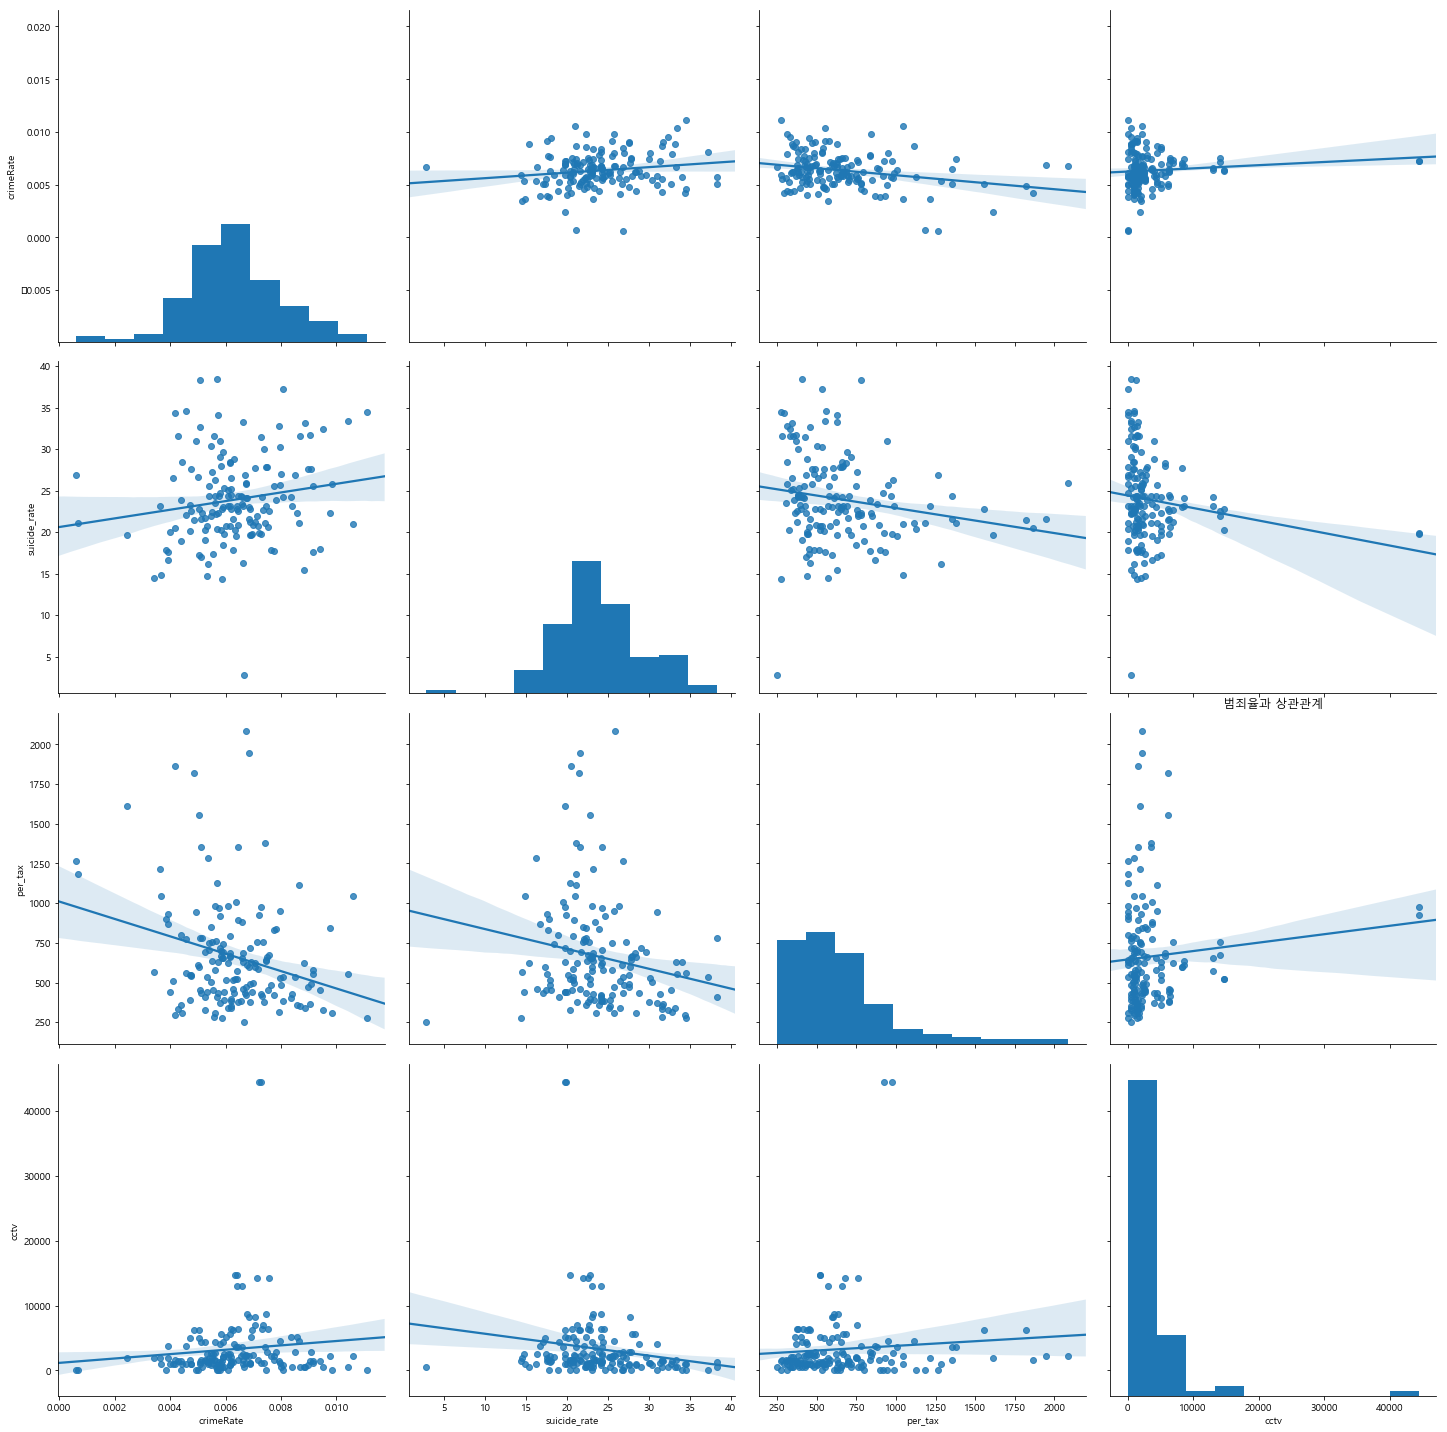

In [34]:
sns.pairplot(total_data, vars=["crimeRate", "suicide_rate", "per_tax", "cctv"], kind='reg', size=5)
plt.show()

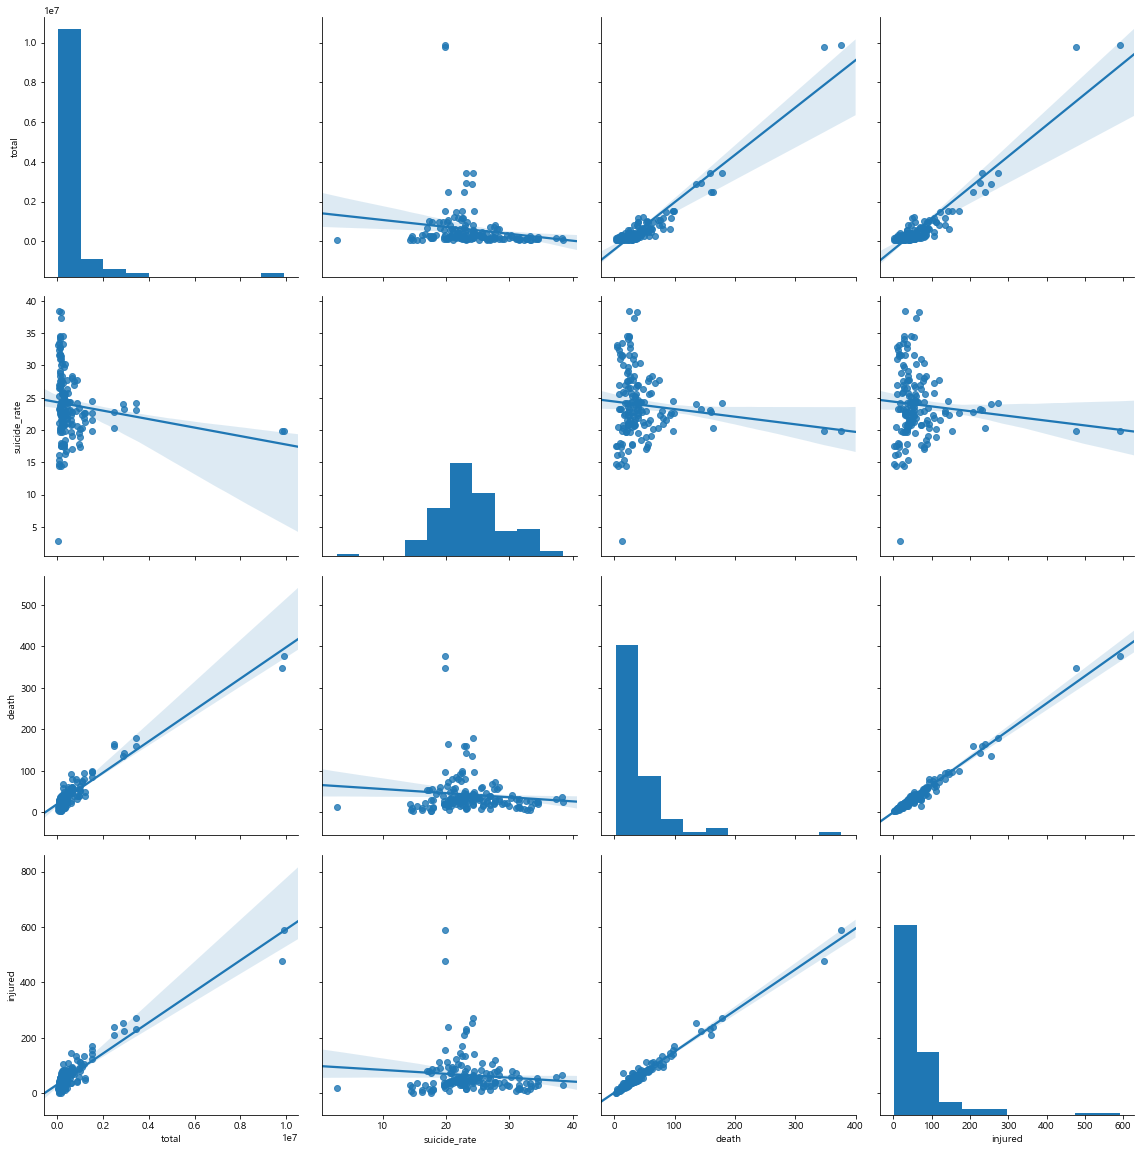

In [36]:
sns.pairplot(total_data, vars=["total",  "suicide_rate", "death","injured"], kind='reg', size=4)
plt.show()

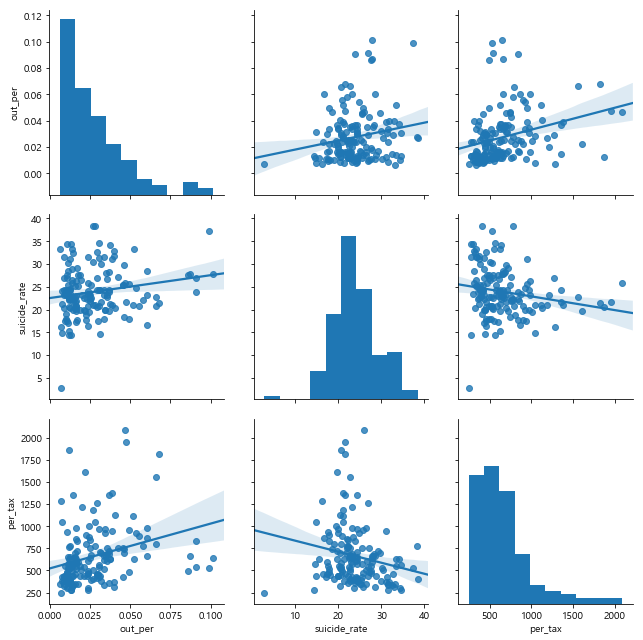

In [38]:
sns.pairplot(total_data, vars=["out_per", "suicide_rate", "per_tax"], kind='reg', size=3)
plt.show()

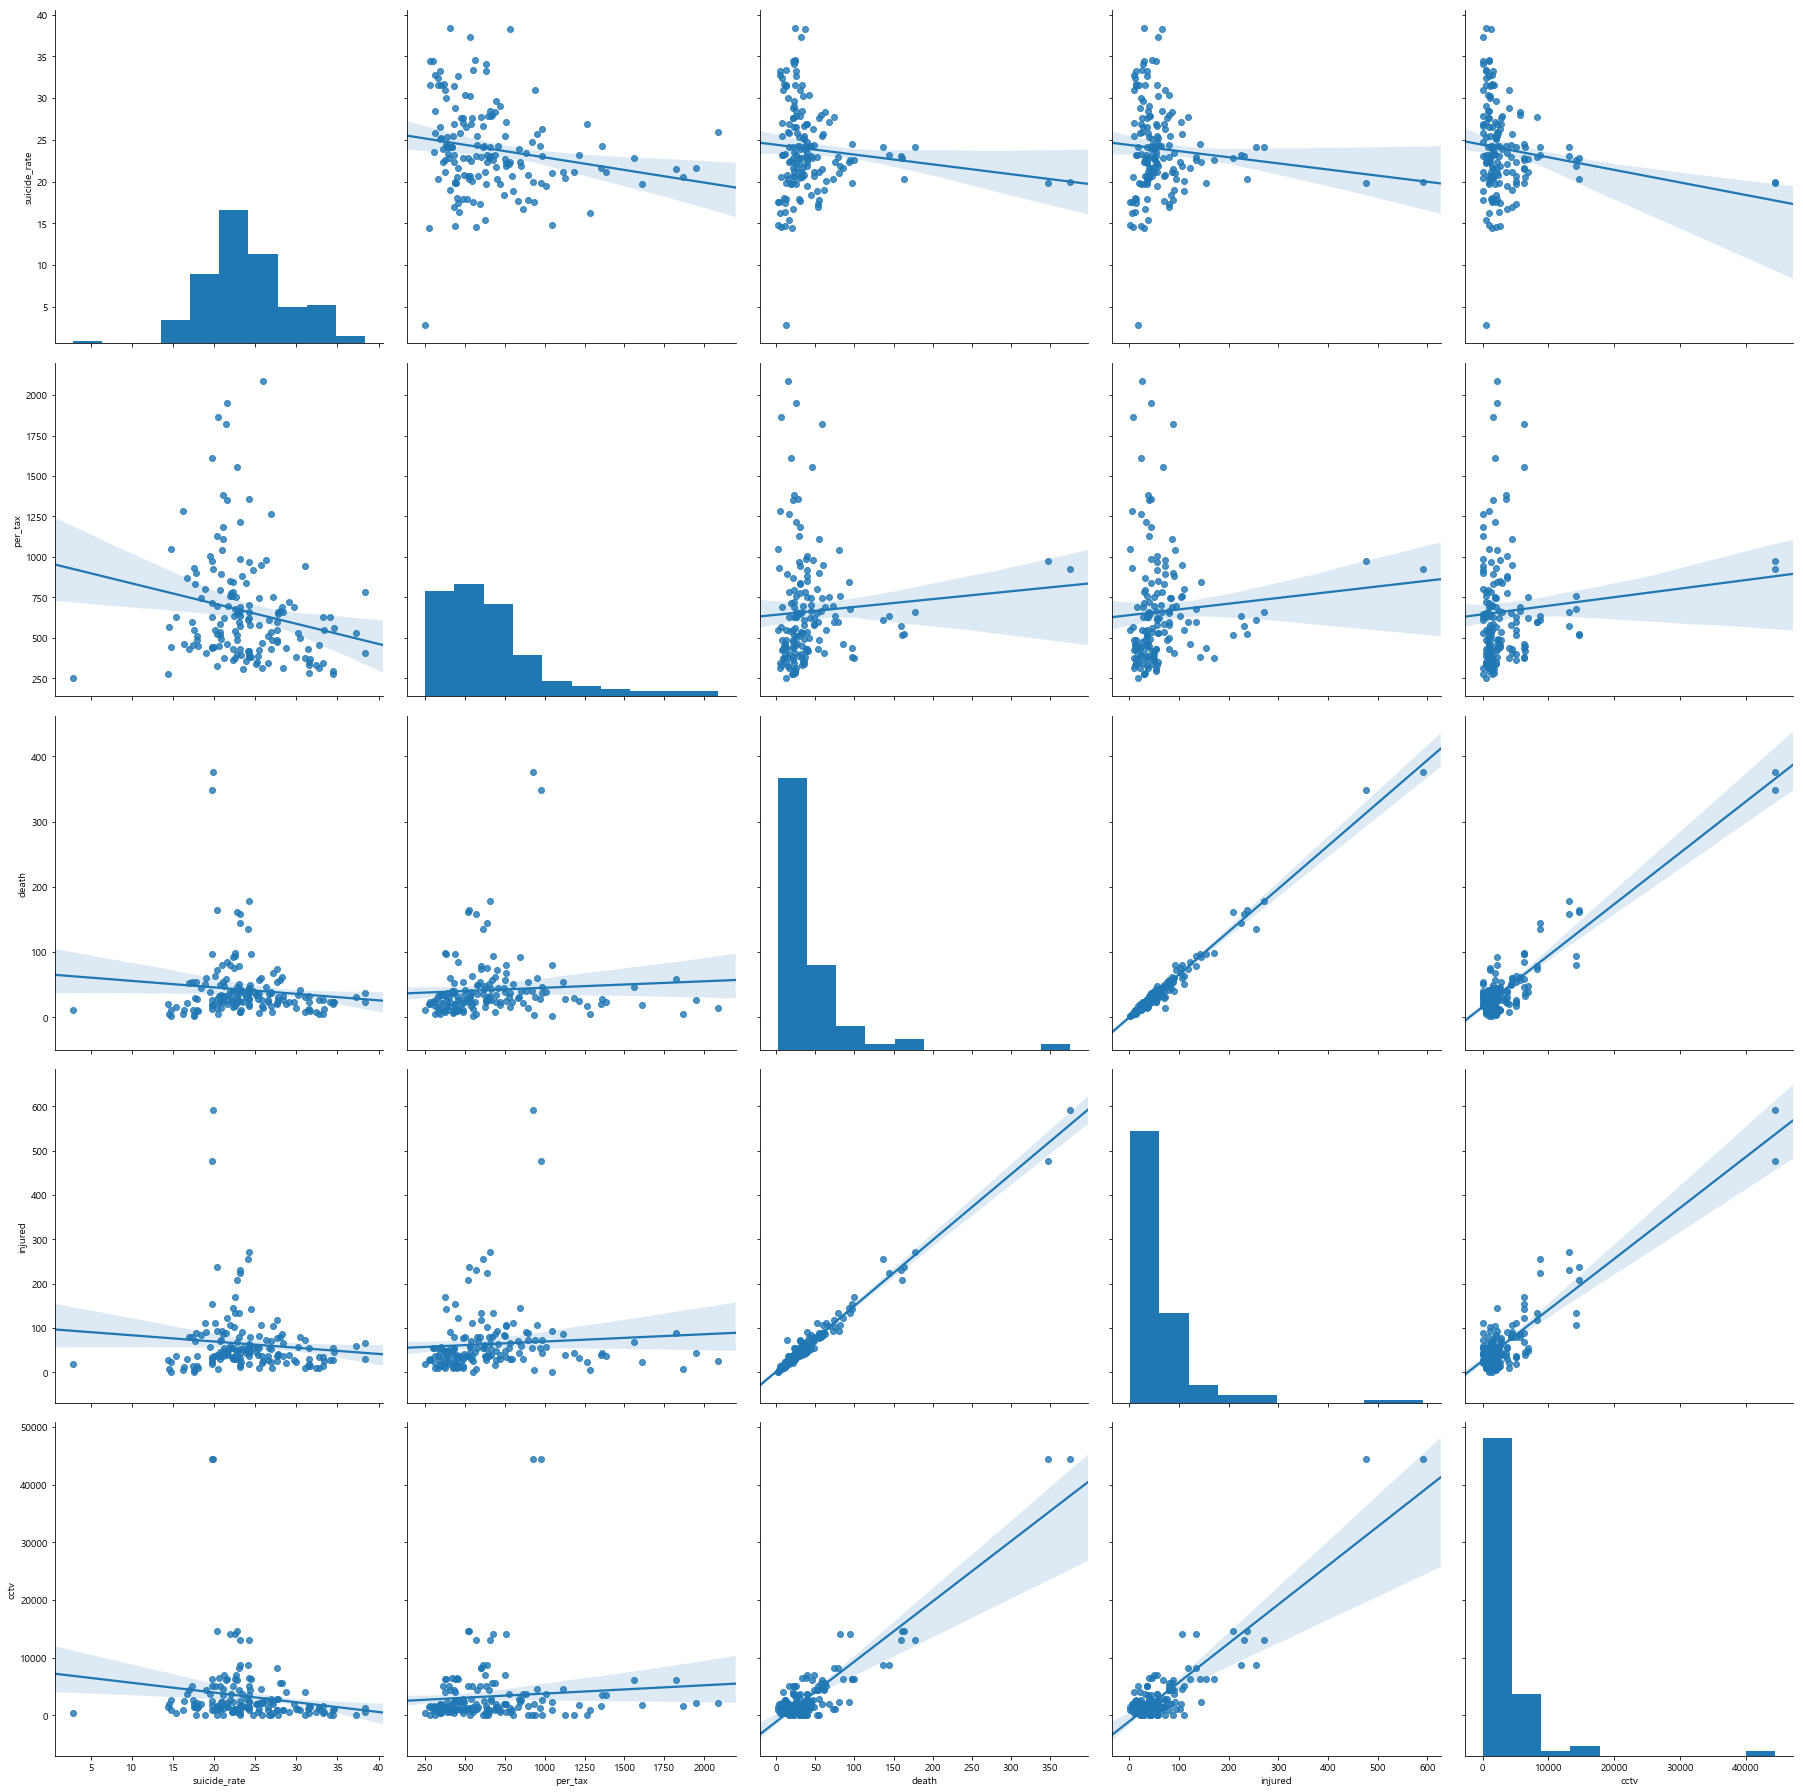

In [39]:
sns.pairplot(total_data, vars=["suicide_rate", "per_tax", "death", "injured","cctv"], kind='reg', size=5)
plt.show()

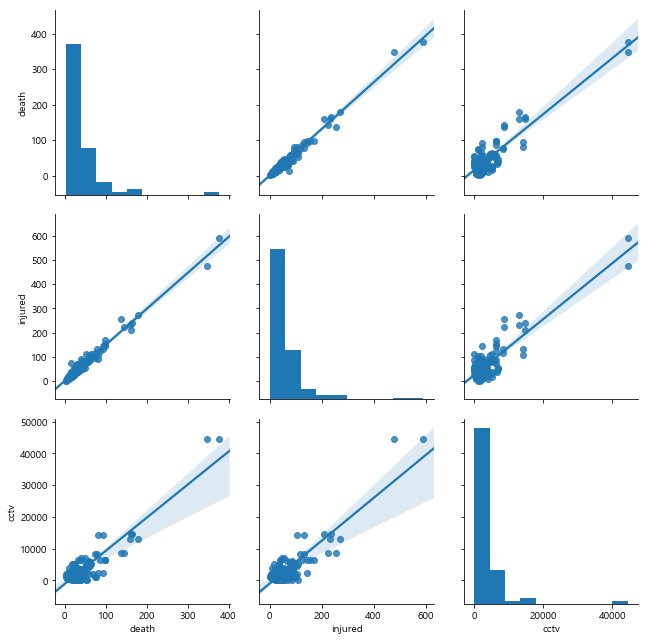

In [40]:
sns.pairplot(total_data, vars=["death", "injured","cctv"], kind='reg', size=3)
plt.show()